1. Importando pacotes necessários

In [20]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import freeman
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import log, exp

2. Carregando a rede existente no arquivo .gml para uma variavel.

In [31]:
g = freeman.load('network.gml')

3. Leitura do arquivo csv de todas as aparições de rebatedores ao prato e tambem eliminando repeticao de rebatedores atraves do metodo `unique`.

In [32]:
atbats = pd.read_csv('atbats.csv')
pitchers = atbats.pitcher_id.unique()

4. Leitura dos dados sobre arremessadores.

In [33]:
pitcher_data = pd.read_csv('pitcher_data.csv')
pitcher_data = pitcher_data.loc[pitcher_data.cERA > 0]

5. Usando a biblioteca `networkx` e calculado as centralidades de `betweenness`, `degree` e `closeness` da rede previamente carregada a partir do .gml.

In [34]:
bc = nx.betweenness_centrality(g) #13
dc = nx.degree_centrality(g)
cc = nx.closeness_centrality(g)

6. Criacao de um dicionario o qual possui como chave o identificador do arremessador e valor um objeto com seu `betweness`, `degree` e `closeness`.

Exemplo de um item do dicionario: 

In [35]:
dict_exemplo = {
    'id_arremessador': {
        'betweness': 'x',
        'degree': 'y',
        'closeness': 'z'
    }
}

In [36]:
pitcher_metrics = {}
for pitcher in pitchers:
    pitcher_metrics[pitcher] = {
        'betweness': bc[pitcher],
        'degree': dc[pitcher],
        'closeness': cc[pitcher]
    }

7. Criacao de um data frame com as seguintes colunas: `pitcher_id`(id do arremessador), `betweness`(betweness do arremessador), `degree`(degree do arremessador) e `closeness`(closeness do arremessador)
para melhor exploracao das variaveis

In [37]:
data = pd.DataFrame({
    'pitcher_id': [n for n in pitcher_metrics.keys()],
    'betweness': [n['betweness'] for n in pitcher_metrics.values()],
    'degree': [n['degree'] for n in pitcher_metrics.values()],
    'closeness': [n['closeness'] for n in pitcher_metrics.values()]
})

8. Histograma dos betwenesses

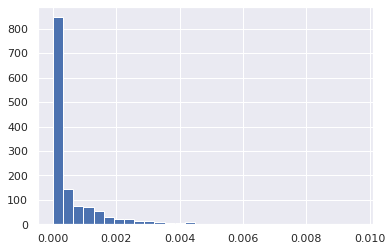

In [ ]:
plt.hist(data.betweness, bins=30);

9. Histograma dos degrees

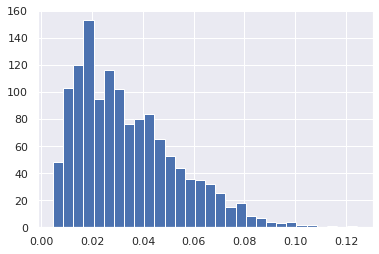

In [ ]:
plt.hist(data.degree, bins=30);

10. Histograma dos closenesses

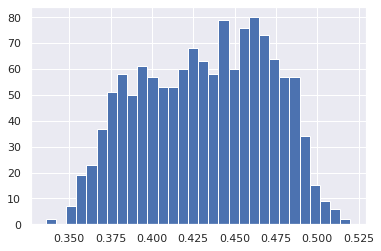

In [ ]:
plt.hist(data.closeness, bins=30);

11. Histograma das variaveis WHIP e ERA

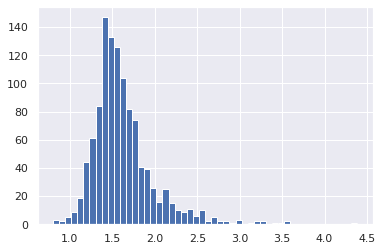

In [24]:
plt.hist(pitcher_data.WHIP, bins=50); #32

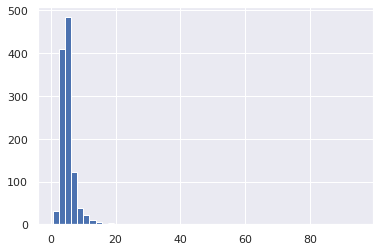

In [23]:
plt.hist(pitcher_data.cERA, bins=50); #32

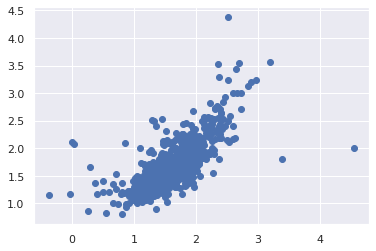

In [48]:
pitcher_data['log_cERA'] = pitcher_data.cERA.apply(lambda x: log(x))
pitcher_data['exp_WHIP'] = pitcher_data.WHIP.apply(lambda x: exp(x))
pitcher_data['log_WHIP'] = pitcher_data.WHIP.apply(lambda x: log(x))
plt.scatter(pitcher_data.log_cERA, pitcher_data.WHIP);

12. Juncao dos data frames de arremessadores e variaveis calculadas atraves do networkx atraves do id do arremessador.

In [41]:
merged = pd.merge(data, pitcher_data, on=['pitcher_id'], how='inner')
merged = merged[['WHIP', 'closeness', 'degree', 'betweness', 'cERA', 'log_cERA']]

13. Iteracao entre os dados para normalizar os dados.

In [42]:
for column in merged.columns:
    max_value = merged[column].max()
    min_value = merged[column].min()
    merged[column] = (merged[column] - min_value)/(max_value - min_value)

14. Regressao linear entre as variaveis dependentes WHIP e ERA e as idependentes: `closeness`, `degree`, `betweness`, para verificar a correlacao entre estas.

In [43]:
model = sm.OLS(merged['WHIP'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   WHIP   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              804.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):                   4.62e-279
Time:                        20:45:46   Log-Likelihood:                          598.39
No. Observations:                1126   AIC:                                     -1191.
Df Residuals:                    1123   BIC:                                     -1176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      1.0287      0.051     20.154      0.000       0.929       1.129
degree        -1.4990      0.130    -11.526      0.000      -1.754      -1.244
betweness      0.6823      0.127      5.367      0.000       0.433       0.932
==============================================================================
Omnibus:                      273.991   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.698
Skew:                           1.275   Prob(JB):                    3.14e-152
Kurtosis:                       5.893   Cond. No.                         26.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model = sm.OLS(merged['cERA'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cERA   R-squared (uncentered):                   0.517
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              401.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):                   4.57e-177
Time:                        20:45:49   Log-Likelihood:                          1947.3
No. Observations:                1126   AIC:                                     -3889.
Df Residuals:                    1123   BIC:                                     -3873.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      0.2328      0.015     15.112      0.000       0.203       0.263
degree        -0.3554      0.039     -9.054      0.000      -0.432      -0.278
betweness      0.1738      0.038      4.530      0.000       0.099       0.249
==============================================================================
Omnibus:                     1933.885   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2496445.307
Skew:                          10.970   Prob(JB):                         0.00
Kurtosis:                     232.628   Cond. No.                         26.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model = sm.OLS(merged['log_cERA'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               log_cERA   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              1895.
Date:                Fri, 06 Nov 2020   Prob (F-statistic):                        0.00
Time:                        20:46:01   Log-Likelihood:                          434.43
No. Observations:                1126   AIC:                                     -862.9
Df Residuals:                    1123   BIC:                                     -847.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      1.5130      0.059     25.627      0.000       1.397       1.629
degree        -1.8552      0.150    -12.332      0.000      -2.150      -1.560
betweness      0.6329      0.147      4.304      0.000       0.344       0.921
==============================================================================
Omnibus:                       96.232   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.820
Skew:                           0.736   Prob(JB):                     3.52e-27
Kurtosis:                       3.654   Cond. No.                         26.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""